Problem Statement: Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

Age	Age in years
Sex	        1 = male; 0 = female
cp|	        Chest pain type
trestbps	Resting blood pressure (in mm Hg on admission to the hospital)
chol	    Serum cholesterol in mg/dl
fbs	        Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg	    Resting electrocardiographic results
thalach	    Maximum heart rate achieved
exang	    Exercise induced angina (1 = yes; 0 = no)
oldpeak	    ST depression induced by exercise relative to rest
slope	    Slope of the peak exercise ST segment
ca	        Number of major vessels (0-3) colored by fluoroscopy
thal	    3 = normal; 6 = fixed defect; 7 = reversible defect
Target	    1 or 0


### Imports / Data Load

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_iris

import matplotlib.pyplot as plt
import seaborn as sns

import openpyxl

from sklearn.impute import SimpleImputer
%matplotlib inline

In [3]:
dfhealth = pd.read_excel("1645792390_cep1_dataset.xlsx")

### Exploratory Data Analysis

In [4]:
dfhealth.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dfhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dfhealth.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
# a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data   describe function
dfhealth.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
print(dfhealth['sex'].unique())
print(dfhealth['cp'].unique())
print(dfhealth['fbs'].unique())
print(dfhealth['exang'].unique())
print(dfhealth['ca'].unique())
print(dfhealth['thal'].unique())
print(dfhealth['restecg'].unique())
print(dfhealth['slope'].unique())




[1 0]
[3 2 1 0]
[1 0]
[0 1]
[0 2 1 3 4]
[1 2 3 0]
[0 1 2]
[0 2 1]


In [9]:
print(dfhealth['trestbps'].unique())
print(dfhealth['chol'].unique())
print(dfhealth['thalach'].unique())
print(dfhealth['oldpeak'].unique())

[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
[150 187 172 178 163 148 153 173 162 174 160 139 171 144 158 114 151 161
 179 137 157 123 152 168 140 188 125 170 165 142 180 143 182 156 115 149
 146 175 186 185 159 130 190 132 147

In [10]:
#dentify the data variables which are categorical and 
categ_cols = ['sex','cp','fbs','exang','ca','thal','restecg','slope']
numer_cols = ['trestbps','chol','thalach','oldpeak','age']


c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\M

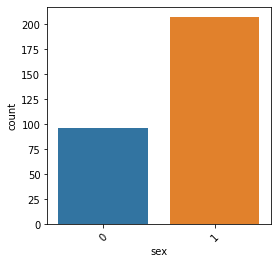

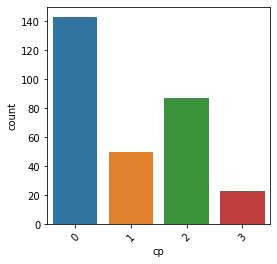

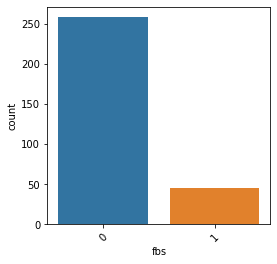

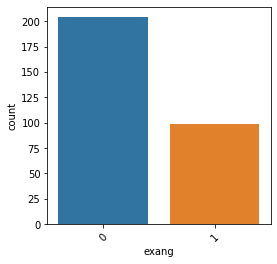

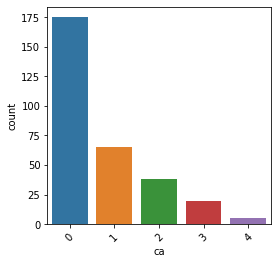

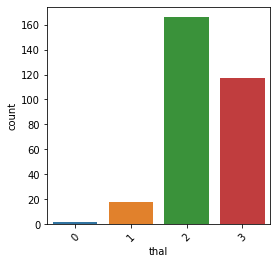

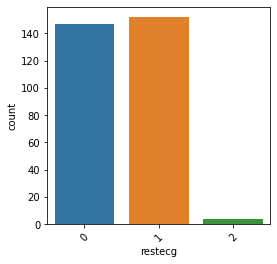

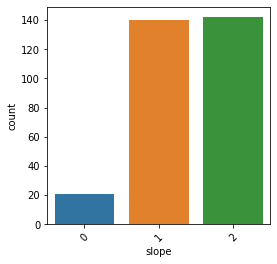

In [11]:
# describe and explore these variables using the appropriate tools, such as count plot. Count plot for categorical value.  
for j in range(0, len(categ_cols),1):  # len(numerical_feature_columns)
    plt.figure(figsize=(4,4))
    plt.xticks(rotation=45)
    sns.countplot(categ_cols[j],data=dfhealth)

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='age'>

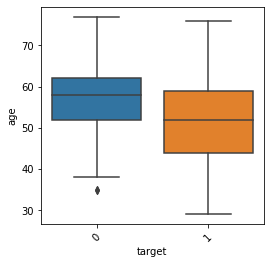

In [12]:
#c.	Study the occurrence of CVD across the Age category
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
sns.boxplot('target','age',data=dfhealth)

target    0    1
target          
0       138    0
1         0  165


<AxesSubplot:xlabel='target'>

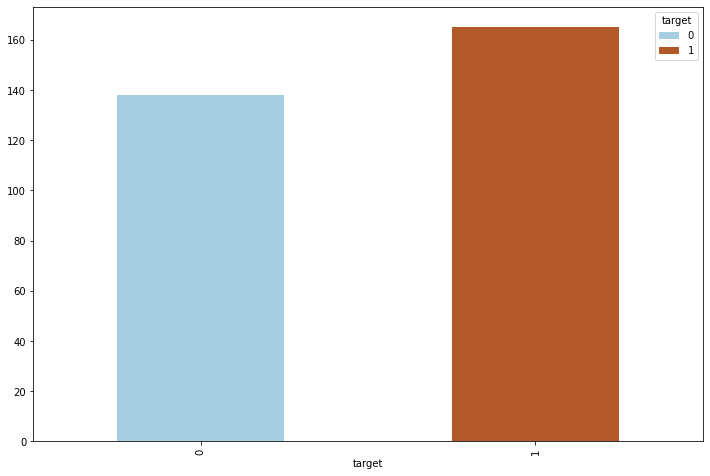

In [13]:
#d.	Study the composition of all patients’ with respect to the Sex category.  Sex x,  other numerical on Y.   
crosstab = pd.crosstab(index=dfhealth["target"], columns=dfhealth["target"])
print(crosstab)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='trestbps'>

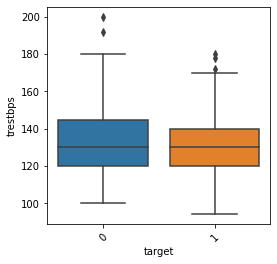

In [14]:
#e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
sns.boxplot('target','trestbps',data=dfhealth)

In [15]:
from scipy.stats import spearmanr
coef, p = spearmanr(dfhealth['target'], dfhealth['trestbps'])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)


Spearmans correlation coefficient: -0.122
Samples are correlated (reject H0) p=0.034


c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='chol'>

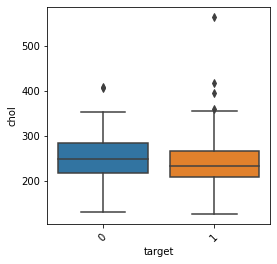

In [16]:
#f.	Describe the relationship between cholesterol levels and a target variable
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
sns.boxplot('target','chol',data=dfhealth)

In [17]:
from scipy.stats import spearmanr
coef, p = spearmanr(dfhealth['target'], dfhealth['chol'])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.121
Samples are correlated (reject H0) p=0.035


c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='oldpeak'>

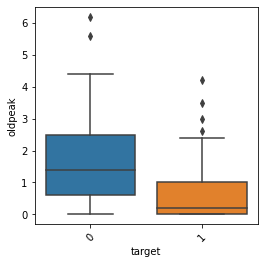

In [18]:
#g.	State what relationship exists between peak exercising and the occurrence of a heart attack    
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
sns.boxplot('target','oldpeak',data=dfhealth)

In [19]:
from scipy.stats import spearmanr
coef, p = spearmanr(dfhealth['target'], dfhealth['oldpeak'])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.421
Samples are correlated (reject H0) p=0.000


c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='thal'>

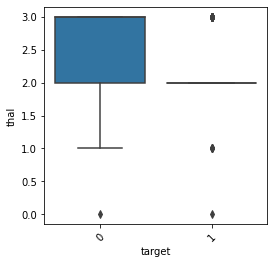

In [20]:
#h.	Check if thalassemia is a major cause of CVD
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
sns.boxplot('target','thal',data=dfhealth)

In [21]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(dfhealth['target'], columns=dfhealth['thal'])
chi2, p, dof, expected = chi2_contingency(crosstab)
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 2.233350721012921e-18
Reject NULL HYPOTHESIS


<AxesSubplot:>

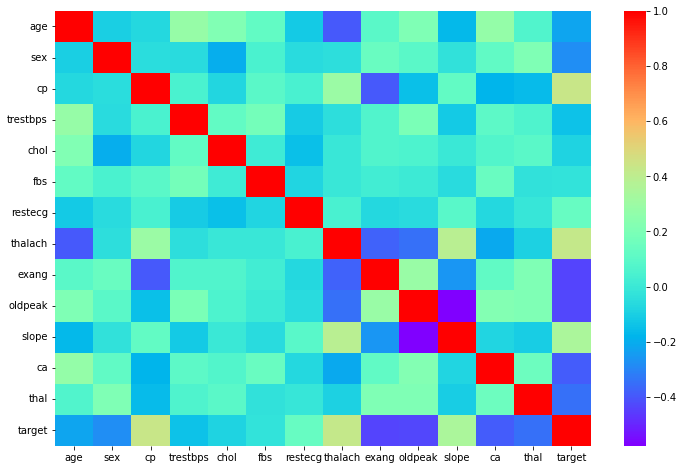

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(dfhealth.corr(),cmap='rainbow')

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 288x288 with 0 Axes>

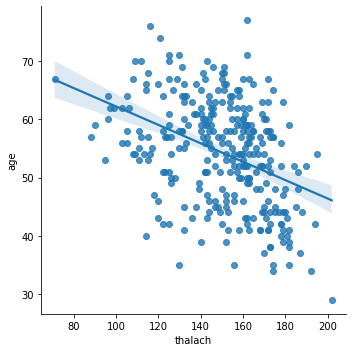

<Figure size 288x288 with 0 Axes>

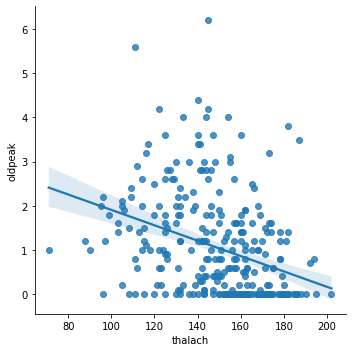

In [24]:
plt.figure(figsize=(4,4))
sns.lmplot('thalach', 'age',data=dfhealth, fit_reg=True)
plt.figure(figsize=(4,4))
sns.lmplot('thalach', 'oldpeak',data=dfhealth, fit_reg=True)


c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\h

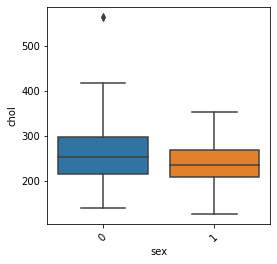

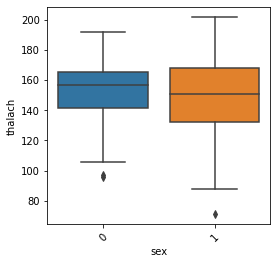

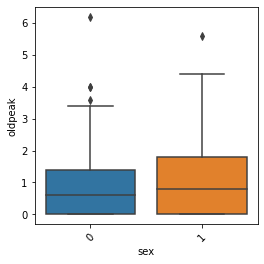

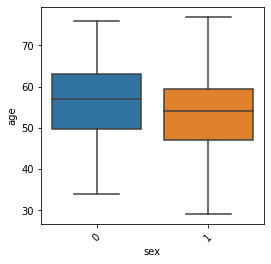

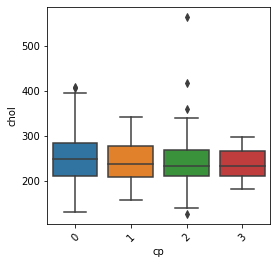

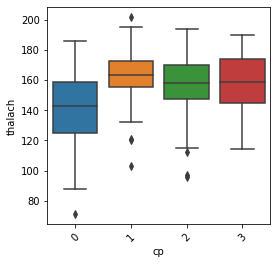

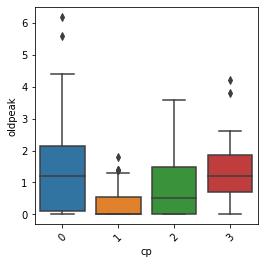

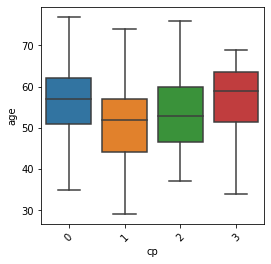

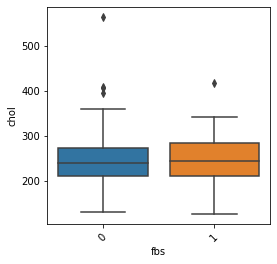

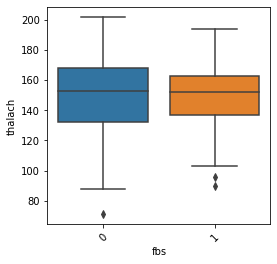

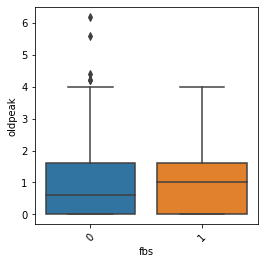

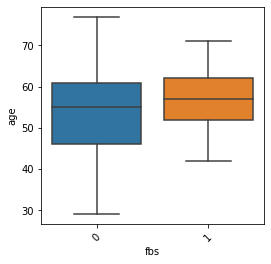

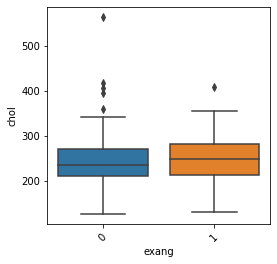

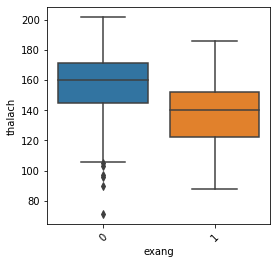

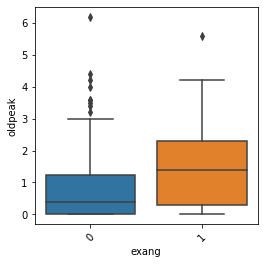

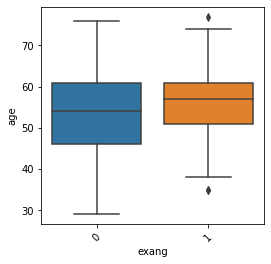

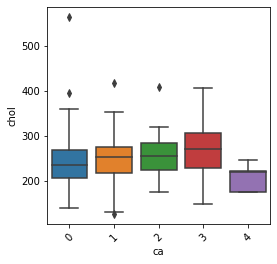

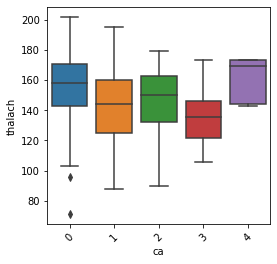

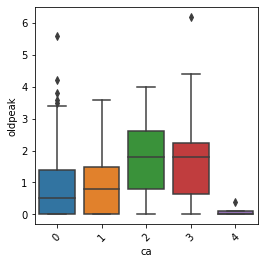

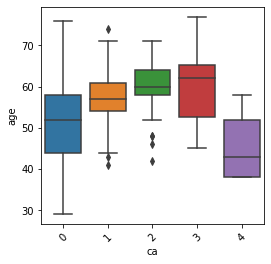

In [130]:
#d.	Study the composition of all patients’ with respect to the Sex category.  Sex x,  other numerical on Y
for i in range(0, 5 ,1): # len(categorical_feature_columns)
    for j in range(1, 5 ,1):  # len(numerical_feature_columns)
        plt.figure(figsize=(4,4))
        plt.xticks(rotation=45)
        sns.boxplot(categ_cols[i],numer_cols[j],data=dfhealth)

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\h

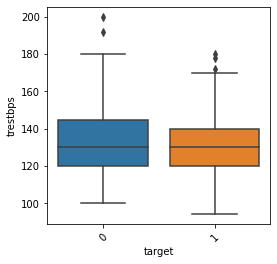

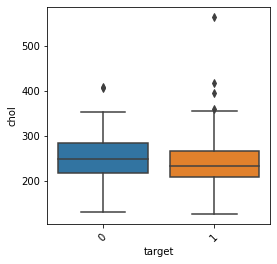

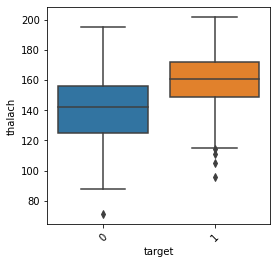

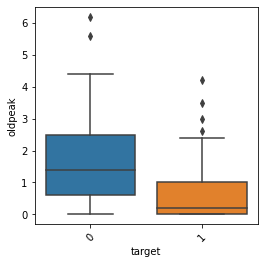

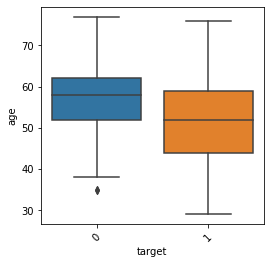

In [131]:
for j in range(0, len(numer_cols) ,1):  # len(numerical_feature_columns)
    plt.figure(figsize=(4,4))
    plt.xticks(rotation=45)
    sns.boxplot('target',numer_cols[j],data=dfhealth)

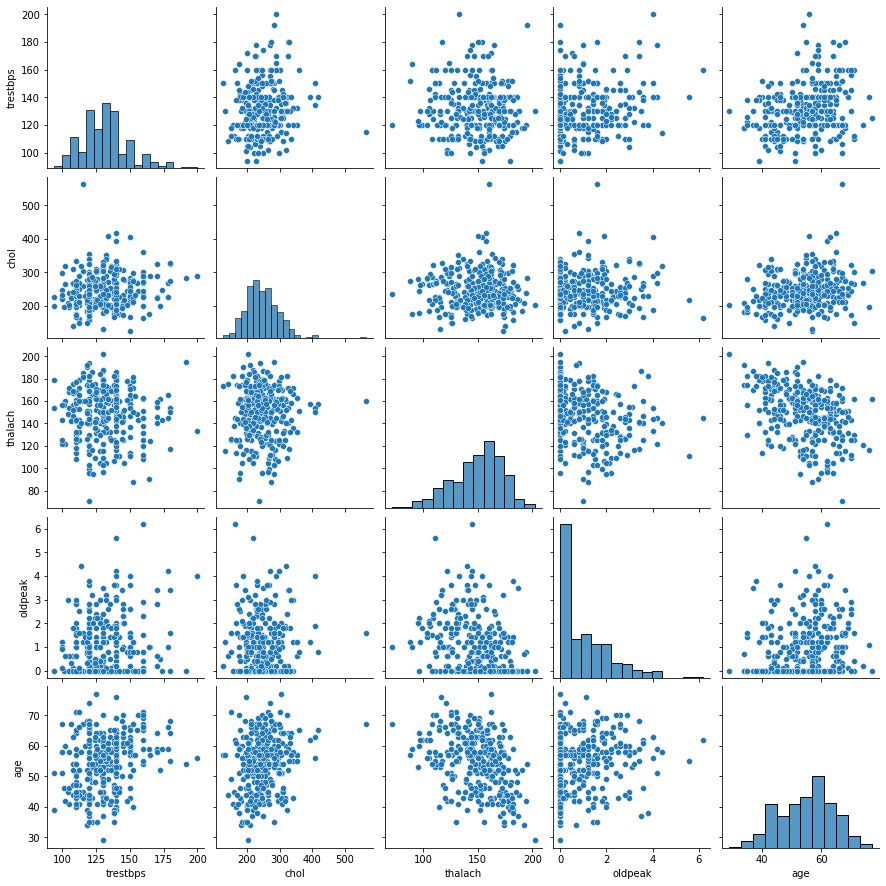

In [132]:
#j.	Use a pair plot to understand the relationship between all the given variables
sns.pairplot(dfhealth[numer_cols])

### Split dataset - Test / Training

In [133]:
X = dfhealth[categ_cols + numer_cols]
y = dfhealth['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)
X_train.shape, X_test.shape

((212, 13), (91, 13))

### Logistic Regression - Statsmodels

In [134]:
# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression 
#from statsmodels.discrete.discrete_model import  Logit
import statsmodels.api as sm
#LR = Logit()
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.345183
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.4994
Time:                        20:00:05   Log-Likelihood:                -73.179
converged:                       True   LL-Null:                       -146.18
Covariance Type:            nonrobust   LLR p-value:                 3.655e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.5099      0.546     -2.765      0.006      -2.580      -0.440
cp             0.8586      0.

In [135]:
y_pred = log_reg.predict(X_test)
prediction = list(map(round, y_pred))

print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
Predictions : [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]


In [136]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[33  8]
 [ 7 43]]
Test accuracy =  0.8351648351648352


### Logistic Regression - Statsmodels  (Feature Selection)

In [25]:
# Based on P value obtained, here the most useful features
new_X = dfhealth[['sex','cp','ca','thal','thalach','oldpeak']]
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_X, y, test_size=0.3, random_state=142)
X_train_new.shape, X_test_new.shape

NameError: name 'y' is not defined

In [138]:
# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression 
import statsmodels.api as sm
log_reg = sm.Logit(y_train_new, X_train_new).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.374728
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.4566
Time:                        20:00:06   Log-Likelihood:                -79.442
converged:                       True   LL-Null:                       -146.18
Covariance Type:            nonrobust   LLR p-value:                 4.345e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.2096      0.470     -2.572      0.010      -2.131      -0.288
cp             0.8935      0.

In [139]:
y_pred_new = log_reg.predict(X_test_new)
prediction_new = list(map(round, y_pred_new))

print('Actual values', list(y_test_new.values))
print('Predictions :', prediction_new)

Actual values [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
Predictions : [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]


In [140]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
# confusion matrix
cm = confusion_matrix(y_test_new, prediction_new) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test_new, prediction_new))

Confusion Matrix : 
 [[33  8]
 [ 7 43]]
Test accuracy =  0.8351648351648352


### Random Forest Classifier

In [141]:
# import the regressor
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
regressor = RandomForestClassifier(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=50, random_state=0)

In [142]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[33  8]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

0.8351648351648352


### Random Forest Classifier - Feature Selection

In [144]:
# import the regressor
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
regressor = RandomForestClassifier(n_estimators = 50, random_state = 0)
regressor.fit(X_train_new, y_train_new) 

RandomForestClassifier(n_estimators=50, random_state=0)

In [145]:
y_pred_new = regressor.predict(X_test_new)
y_pred_new

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [146]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test_new,y_pred_new))
print(classification_report(y_test_new,y_pred_new))
print(accuracy_score(y_test_new, y_pred_new))

[[31 10]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

0.8131868131868132
